In [6]:
# Değişkenlerin Yakalanması ve İşlemlerin Genelleştirilmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("titanic")

In [20]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]
    cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category","object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64","float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car
    

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 4


In [9]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),"Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("--------------------------------------------")

In [10]:
for col in cat_cols:
    cat_summary(df,col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
--------------------------------------------
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
--------------------------------------------
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
--------------------------------------------
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
--------------------------------------------
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
--------------------------------------------
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
--------------------------------------------
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
---------

In [11]:
def num_summary(dataframe,numeric_col, plot=False):
    quantiles = [0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99]
    a = dataframe[numeric_col].describe(quantiles).T
    print(a)
    if plot:
        dataframe[numeric_col].hist()
        plt.xlabel(numeric_col)
        plt.title(numeric_col)
        plt.show(block=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


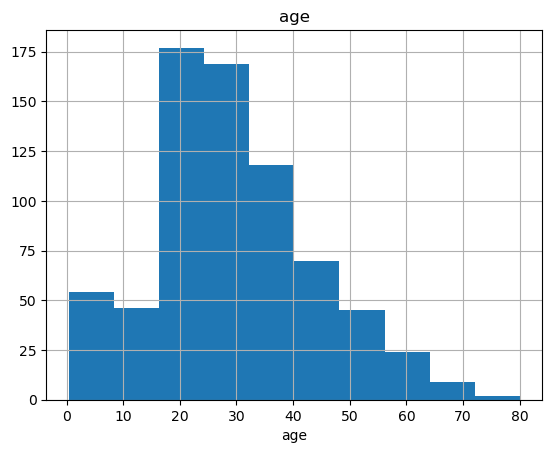

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


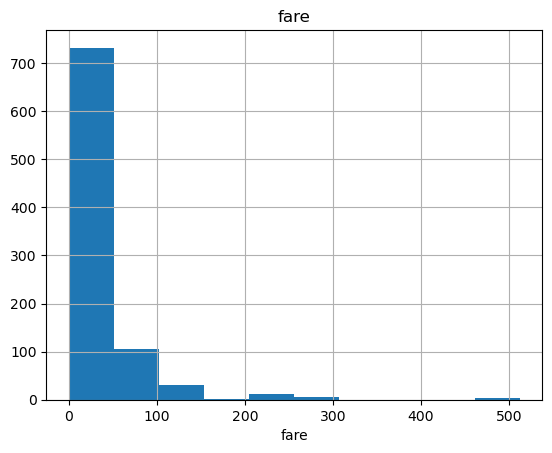

In [26]:
for col in num_cols:
    num_summary(df,col,True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Observations: 891
Variables: 15
cat_cols: 11
num_cols: 2
cat_but_car: 0
num_but